### Prediction Model

In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load Data
df = pd.read_csv("./data/student_performance_large_dataset.csv")

In [3]:
df

,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night,Final_Grade
0,S00001,18,Female,48,Kinesthetic,14,Yes,100,69,66,Yes,High,9,8,C
1,S00002,29,Female,30,Reading/Writing,20,No,71,40,57,Yes,Medium,28,8,D
2,S00003,20,Female,47,Kinesthetic,11,No,60,43,79,Yes,Low,13,7,D
3,S00004,23,Female,13,Auditory,0,Yes,63,70,60,Yes,Low,24,10,B
4,S00005,19,Female,24,Auditory,19,Yes,59,63,93,Yes,Medium,26,8,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,S09996,20,Male,30,Auditory,6,Yes,62,58,76,Yes,Medium,17,6,C
9996,S09997,23,Female,16,Visual,8,Yes,54,84,86,Yes,Medium,6,5,B
9997,S09998,26,Male,23,Visual,3,Yes,54,40,70,No,Medium,20,8,D
9998,S09999,18,Male,41,Reading/Writing,7,Yes,66,45,90,Yes,Low,6,8,D


### Preprocess Data

In [27]:
# Separate features and target
X = df.drop(columns=["Student_ID", "Exam_Score (%)", "Final_Grade", "Gender", "Age"])  # exclude ID, scores and non changeable features
y = df["Exam_Score (%)"]
X

,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate (%),Attendance_Rate (%),Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
0,48,Kinesthetic,14,Yes,100,66,Yes,High,9,8
1,30,Reading/Writing,20,No,71,57,Yes,Medium,28,8
2,47,Kinesthetic,11,No,60,79,Yes,Low,13,7
3,13,Auditory,0,Yes,63,60,Yes,Low,24,10
4,24,Auditory,19,Yes,59,93,Yes,Medium,26,8
...,...,...,...,...,...,...,...,...,...,...
9995,30,Auditory,6,Yes,62,76,Yes,Medium,17,6
9996,16,Visual,8,Yes,54,86,Yes,Medium,6,5
9997,23,Visual,3,Yes,54,70,No,Medium,20,8
9998,41,Reading/Writing,7,Yes,66,90,Yes,Low,6,8


Build a pipeline to train the model

In [28]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Preprocessing
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Full pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

Train the model

In [30]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Evaluate
preds = pipeline.predict(X_test)
rmse = root_mean_squared_error(y_test, preds)
print(f"RMSE: {rmse:.2f}")

RMSE: 18.06


Try a few other models like RandomForest and GradientBoost

In [32]:
# Split features and target
X = df.drop(columns=["Student_ID", "Exam_Score (%)", "Final_Grade", "Gender", "Age"])
y = df["Exam_Score (%)"]

# Identify column types
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

# Define models and their hyperparameter grids
models = {
    'RandomForest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'model__n_estimators': [50, 100],
            'model__max_depth': [None, 10, 20]
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'model__n_estimators': [100, 200],
            'model__learning_rate': [0.05, 0.1],
            'model__max_depth': [3, 5]
        }
    }
}

results = {}

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop through models
for name, mp in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', mp['model'])
    ])
    
    grid = GridSearchCV(pipeline, mp['params'], cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    preds = best_model.predict(X_test)
    rmse = root_mean_squared_error(y_test, preds)
    
    results[name] = {
        'best_params': grid.best_params_,
        'rmse': rmse
    }

# Print results
for model_name, result in results.items():
    print(f"{model_name} -> RMSE: {result['rmse']:.2f}, Best Params: {result['best_params']}")


RandomForest -> RMSE: 17.83, Best Params: {'model__max_depth': 10, 'model__n_estimators': 100}
GradientBoosting -> RMSE: 17.74, Best Params: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100}


### Analyse Feature Importance

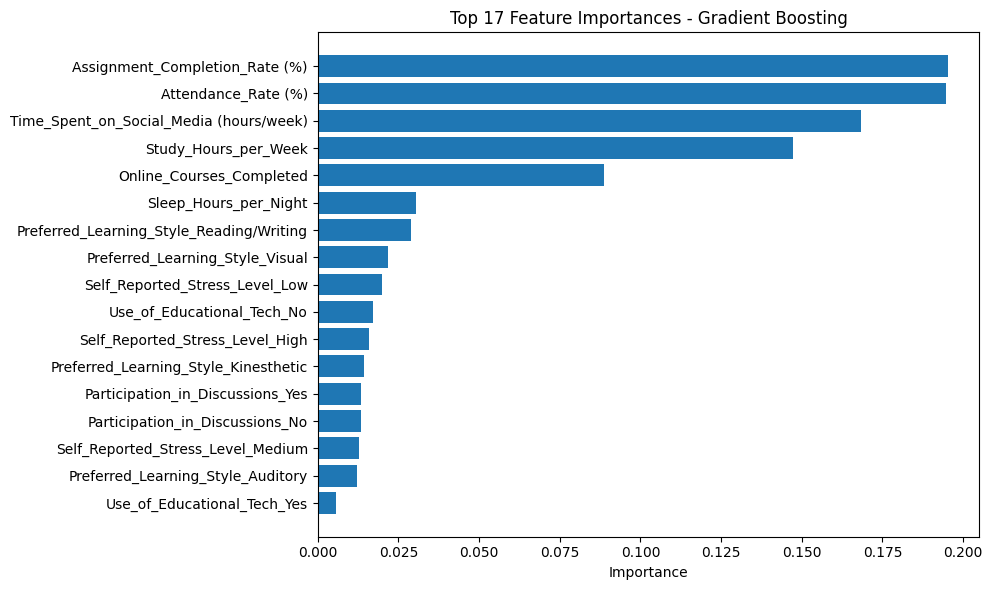

In [34]:
# Best model from GridSearchCV
best_gbr = grid.best_estimator_

# Get feature names after preprocessing
cat_features = best_gbr.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols)
all_features = np.concatenate([numerical_cols, cat_features])

# Get importances
importances = best_gbr.named_steps['model'].feature_importances_

# Number of top features to show
TOP_N = 17

# Sort and get top N
indices = np.argsort(importances)[::-1][:TOP_N]
sorted_features = all_features[indices]
sorted_importances = importances[indices]

# Plot
plt.figure(figsize=(10, 6))
plt.title(f"Top {TOP_N} Feature Importances - Gradient Boosting")
plt.barh(range(TOP_N), sorted_importances, align='center')
plt.yticks(range(TOP_N), sorted_features)
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


It seems that study hours are a dominant feature. We remove it and see if the model generalizes better.

# Actual Prediction Model

In [36]:
# Train data only on 6 most important features
X = df[["Assignment_Completion_Rate (%)", 
        "Attendance_Rate (%)", 
        "Time_Spent_on_Social_Media (hours/week)", 
        "Study_Hours_per_Week", 
        "Online_Courses_Completed"
        ]]
y = df["Exam_Score (%)"]

# Identify column types
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols)
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use optimal parameters from grid search
model = GradientBoostingRegressor(learning_rate=0.05, max_depth=3, n_estimators=200)

pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

pipeline.fit(X_train, y_train)

preds = pipeline.predict(X_test)
rmse = root_mean_squared_error(y_test, preds)
print("RMSE: ", rmse)

RMSE:  17.784504537521176


Predict own score based on trained model.

In [39]:
sample_input = pd.DataFrame([{
    "Assignment_Completion_Rate (%)": 85.0,
    "Attendance_Rate (%)": 90.0,
    "Time_Spent_on_Social_Media (hours/week)": 10.0,
    "Study_Hours_per_Week": 15.0,
    "Online_Courses_Completed": 2
}])

predicted_score = pipeline.predict(sample_input)

print("Predicted Exam Score (%):", predicted_score[0])

Predicted Exam Score (%): 72.41922106637844


### Save the model

In [40]:
import joblib

# Save the trained pipeline (model + preprocessor)
# joblib.dump(pipeline, 'models/prediction_model.pkl')